In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("Crop_Yield_Prediction[1].csv")
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,120000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
 8   Yield        2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 154.8+ KB


In [14]:
df.isnull().sum()

,0
Nitrogen,0
Phosphorus,0
Potassium,0
Temperature,0
Humidity,0
pH_Value,0
Rainfall,0
Crop,0
Yield,0


In [15]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'Yield'],
      dtype='object')

In [76]:
df=df.drop('Yield',axis=1)

In [77]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,57.732726,42.570995,30.820046,26.318335,76.061808,6.552507,96.178372
std,38.189019,22.428078,13.298946,3.488710,14.712455,0.569523,49.404773
min,0.000000,5.000000,5.000000,17.665454,38.231847,5.111489,20.360011
25%,23.000000,24.000000,20.000000,24.224876,63.690706,6.141502,54.778302
50%,54.000000,41.000000,27.000000,26.288460,80.280381,6.526654,91.957924
75%,93.000000,59.000000,43.000000,28.630055,89.413849,6.950301,119.170911
max,127.000000,95.000000,55.000000,34.898149,99.981876,7.903529,207.073512


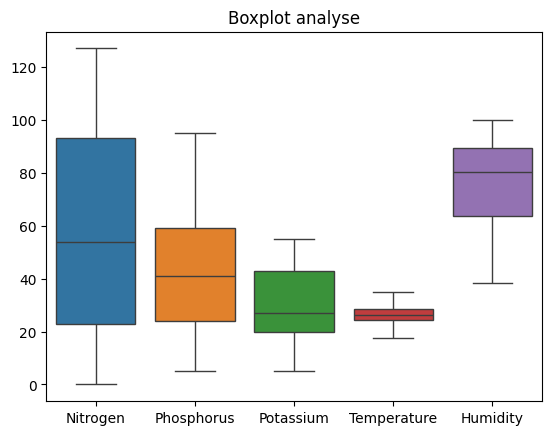

In [78]:
import seaborn as sns
sns.boxplot(data=df[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity']])
plt.title('Boxplot analyse')
plt.show()

In [80]:
col= ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']

z_score=np.abs((df[col]-df[col].mean()))/df[col].std()
outlaiers=(z_score>2.8)
df_cleaned=df[(z_score<=2.8).all(axis=1)]
df=df_cleaned
df


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
13,93,56,36,24.014976,82.056872,6.984354,185.277339,Rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,Rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,Rice
29,84,51,35,22.301574,80.644165,6.043305,197.979121,Rice
31,92,35,40,22.179319,80.331272,6.357389,200.088279,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


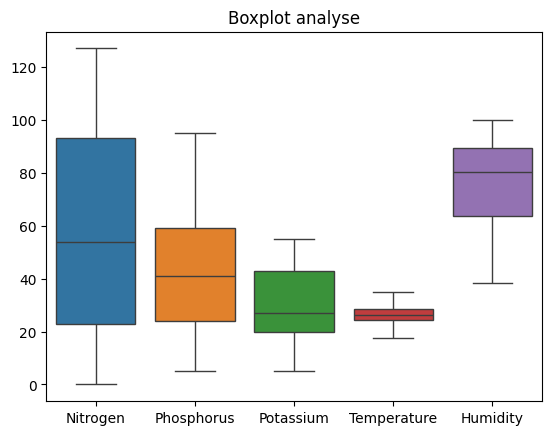

In [81]:
sns.boxplot(data=df[['Nitrogen','Phosphorus','Potassium','Temperature','Humidity']])
plt.title('Boxplot analyse')
plt.show()

In [82]:
len(df['Humidity'])

1317

In [83]:
df1=pd.get_dummies(df['Crop'])
df1


,Banana,Blackgram,Coconut,Coffee,Cotton,Jute,Lentil,Maize,Mango,MothBeans,MungBean,Muskmelon,Orange,Papaya,PigeonPeas,Pomegranate,Rice,Watermelon
13,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
17,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [85]:
X = df.drop('Crop', axis=1)

Y=df['Crop']


In [86]:


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [87]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1053, 7) (1053,)
(264, 7) (264,)


In [90]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
model.score(X_test, y_test)


0.9962121212121212

In [91]:
y_pred=model.predict(X_test.iloc[[0]])
y_pred

array(['Coffee'], dtype=object)

In [92]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [93]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>